In [217]:
import pandas as pd
import numpy as np
import warnings

In [218]:
warnings.filterwarnings('ignore')

In [219]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [220]:
df.shape

(7043, 21)

In [221]:
df = df.drop('customerID', axis=1)

In [222]:
df.isnull().sum().sum()

0

In [223]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [224]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**PLOTTING**

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

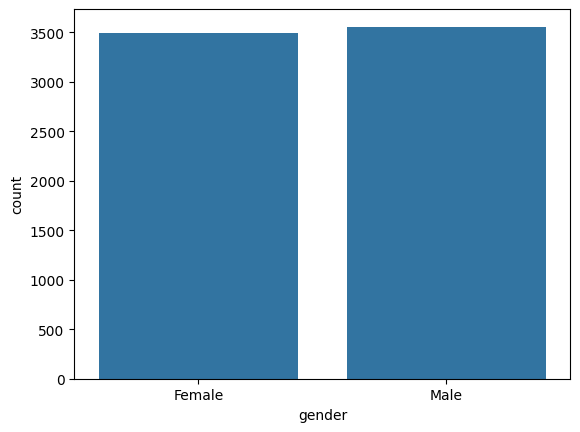

In [226]:
sns.countplot(data=df, x='gender');

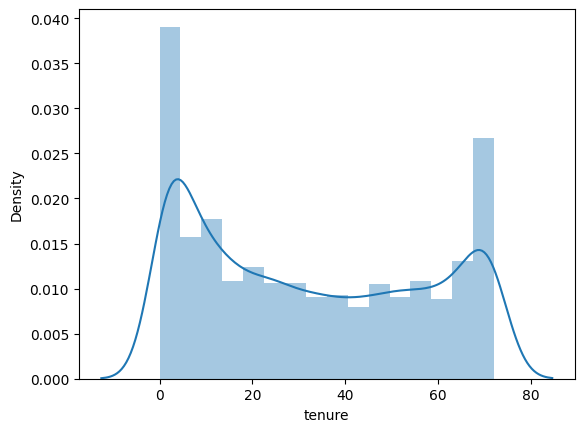

In [227]:
sns.distplot(df['tenure']);

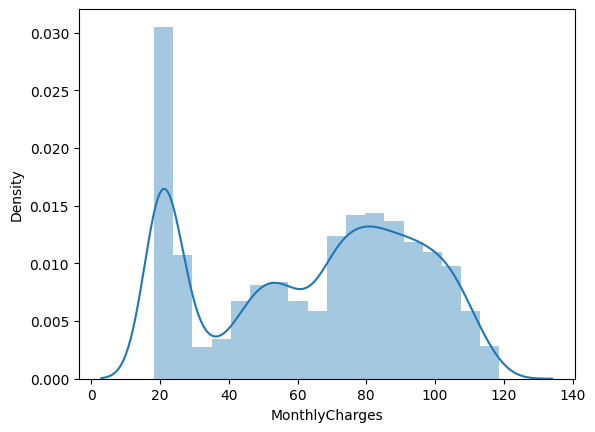

In [228]:
sns.distplot(df['MonthlyCharges']);

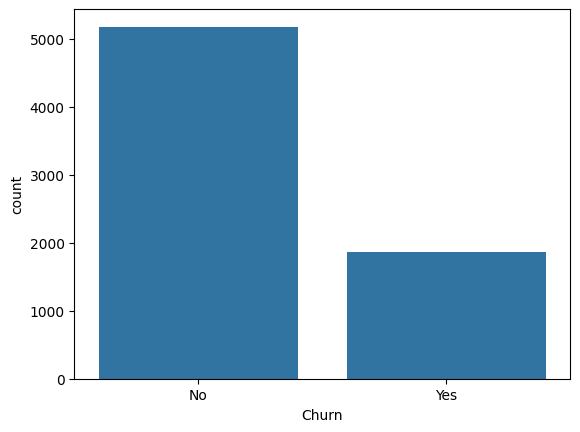

In [229]:
sns.countplot(data=df, x='Churn');

**DATA PREPARATION AND PREPROCESSING**

In [230]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [231]:
enc = LabelEncoder()

In [232]:
for c in df.columns:
    if df[c].dtype == 'O':
        df[c] = enc.fit_transform(df[c])

In [233]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [234]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [235]:
scaler = MinMaxScaler((0, 1))

In [236]:
X = scaler.fit_transform(X)

In [237]:
from sklearn.utils import shuffle

In [238]:
X, y = shuffle(X, y)

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [241]:
print(X_train.shape, '-' * 10, y_train.shape)
print('=' * 60)
print(X_test.shape, '-' * 10, y_test.shape)

(5634, 19) ---------- (5634,)
(1409, 19) ---------- (1409,)


In [242]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [243]:
inp_shape = [X.shape[1]]
print(inp_shape)

[19]


In [244]:
model = Sequential()
model.add(layers.BatchNormalization(input_shape=inp_shape))
model.add(layers.Dense(units=25, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.BatchNormalization())
model.add(layers.Dense(units=25, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.BatchNormalization())
model.add(layers.Dense(units=2, activation='softmax'))

In [245]:
from tensorflow.keras.optimizers import Adam

In [246]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [247]:
from tensorflow.keras.callbacks import EarlyStopping

In [248]:
esc = EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [249]:
hist = model.fit(
    X_train, y_train,
    validation_split=0.2,
    shuffle=True,
    batch_size=256,
    epochs=50,
    verbose=2,
    callbacks=(esc,)
)

Epoch 1/50


18/18 - 1s - loss: 0.6301 - accuracy: 0.6636 - val_loss: 0.5301 - val_accuracy: 0.7400 - 1s/epoch - 57ms/step
Epoch 2/50
18/18 - 0s - loss: 0.4784 - accuracy: 0.7613 - val_loss: 0.5507 - val_accuracy: 0.7400 - 51ms/epoch - 3ms/step
Epoch 3/50
18/18 - 0s - loss: 0.4491 - accuracy: 0.7832 - val_loss: 0.5235 - val_accuracy: 0.7400 - 51ms/epoch - 3ms/step
Epoch 4/50
18/18 - 0s - loss: 0.4389 - accuracy: 0.7799 - val_loss: 0.5079 - val_accuracy: 0.7400 - 52ms/epoch - 3ms/step
Epoch 5/50
18/18 - 0s - loss: 0.4292 - accuracy: 0.7979 - val_loss: 0.4853 - val_accuracy: 0.7400 - 52ms/epoch - 3ms/step
Epoch 6/50
18/18 - 0s - loss: 0.4287 - accuracy: 0.7965 - val_loss: 0.4775 - val_accuracy: 0.7436 - 53ms/epoch - 3ms/step
Epoch 7/50
18/18 - 0s - loss: 0.4235 - accuracy: 0.7985 - val_loss: 0.4866 - val_accuracy: 0.7436 - 49ms/epoch - 3ms/step
Epoch 8/50
18/18 - 0s - loss: 0.4237 - accuracy: 0.8001 - val_loss: 0.4864 - val_accuracy: 0.7542 - 53ms/epoch - 3ms/step
Epoch 9/50
18/18 - 0s - loss: 0.4268

In [252]:
h_df = pd.DataFrame(hist.history)
h_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.630099,0.663634,0.530122,0.740018
1,0.478359,0.761260,0.550695,0.740018
2,0.449087,0.783226,0.523546,0.740018
3,0.438894,0.779898,0.507858,0.740018
4,0.429174,0.797870,0.485341,0.740018


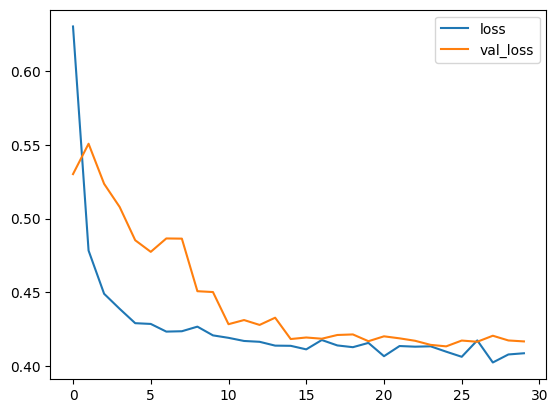

In [253]:
h_df.loc[:, ['loss', 'val_loss']].plot();

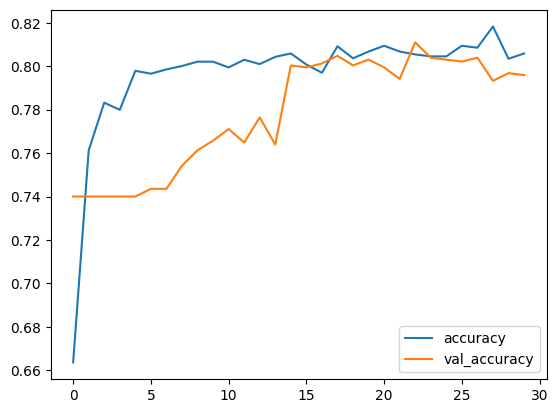

In [254]:
h_df.loc[:, ['accuracy', 'val_accuracy']].plot();

**PREDICTION**

In [255]:
y_pred = model.predict(X_test)
y_pred[:5]

45/45 [==============================] - 0s 910us/step


array([[0.8255477 , 0.17445229],
       [0.45840386, 0.5415961 ],
       [0.63071406, 0.3692859 ],
       [0.85943747, 0.14056252],
       [0.3251097 , 0.67489034]], dtype=float32)

In [256]:
y_test[:5]

6692    0
2953    1
1868    0
4465    0
5030    1
Name: Churn, dtype: int32

In [257]:
from sklearn.metrics import accuracy_score

In [261]:
y_pred[1].argmax()

1

In [267]:
pred = [i.argmax() for i in y_pred]
print(pred)


[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 

In [268]:
print(accuracy_score(y_test, pred))

0.7877927608232789


<img src='https://i.imgflip.com/7o1yci.gif'>

# THANKS FOR THIS DATASET: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

<img src='https://gifdb.com/images/high/black-white-the-end-l1g82rq2vrn6kqyz.gif'>